In [68]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt #visualizations
%matplotlib inline
import seaborn as sns
from sklearn import linear_model

 #   Knowledge Discovery process

In [69]:
#Read in dataset 
data = pd.read_csv("google_play_store_dataset.csv", encoding="utf-8")

Observations: some of the apps listed were not even released as yet.
Also spotted the pattern that these apps all contained some NULL values and would not be important for this specific analysis(remove them from data set).

In [70]:
##checking for all null values in dataset
missing_data_results =data.isnull().sum()
print(missing_data_results)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [71]:
#loops through dataset and delete rows where column values is null
data =data.dropna()
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Install columns contains string characters and as such I remove those charaters in order to work with integer values.
                   BEFORE:                                    
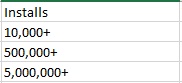


In [72]:
#Using regex \D to remove any non-digit characters
data['Installs']=data['Installs'].replace(regex=True,inplace=False,to_replace=r'\D',value=r'')



AFTER:
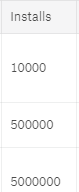

In [73]:
np.sort(data.Installs)

array(['1', '1', '1', ..., '500000000', '500000000', '500000000'],
      dtype=object)

        **Check for duplicate records**

In [58]:
data.shape

(1, 13)

In [9]:
dupes=data.duplicated()
sum(dupes)


483

In [11]:
data=data.drop_duplicates()

Checking data types to ensure integrity

In [13]:
data.dtypes
    

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [104]:
# Clean  columns
data["Installs"] = data["Installs"].replace("[+,]", "", regex=True).astype(int)
data["Reviews"] = data["Reviews"].astype(int)
data["Price"] = data["Price"].replace("[\$,]", "", regex=True).astype(float)
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


**VISUALIZATIONS**

1.📈 Number of Apps available basedon content ratings

In [85]:
#Formatting column names
data.columns =data.columns.str.replace(' ', '_')

Text(0.5, 1.0, 'Number of Apps available based on Content rating')

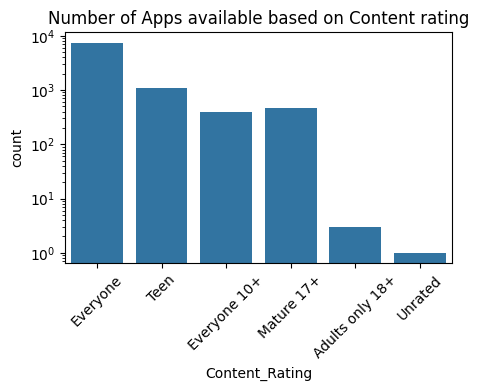

In [87]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Content_Rating', data=data)
plt.yscale('log') #Log scale for better visualization--Value of y axis is too high and diverse
plt.xticks(rotation=45)
plt.title("Number of Apps available based on Content rating")

2. 📈 Plot to show the distribution of available apps from each category in the data set. 

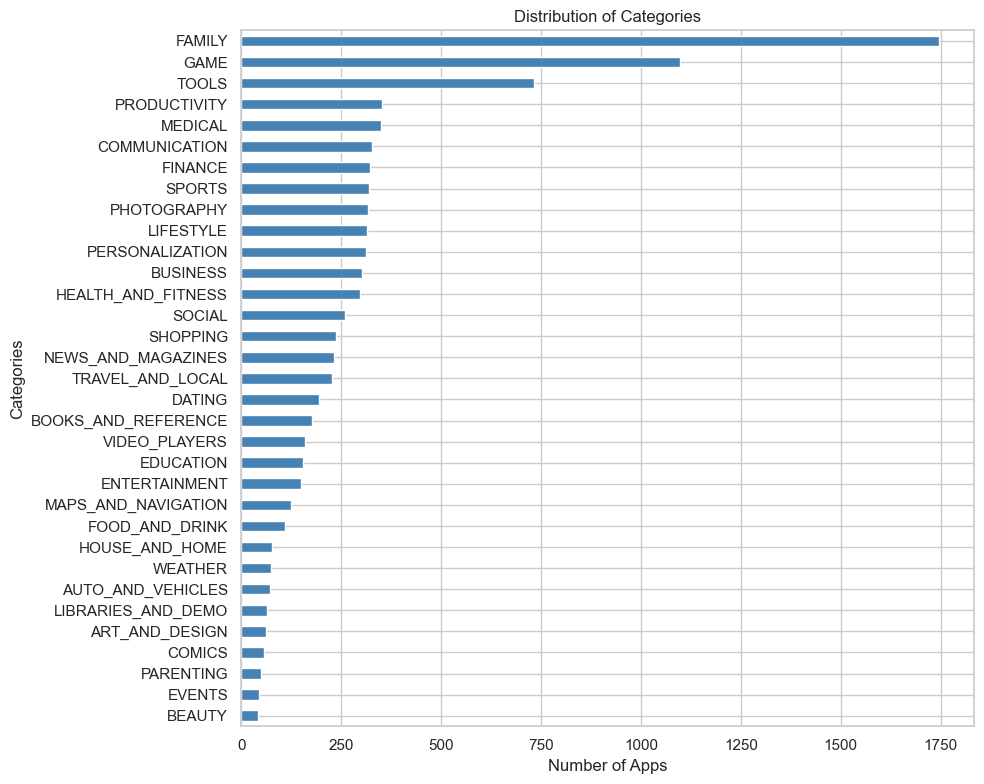

In [232]:
# data['Category'].value_counts()
plt.figure(figsize=(10, 8))
data["Category"].value_counts().plot(kind="barh", color="steelblue")
plt.title("Distribution of Categories")
plt.xlabel("Number of Apps")
plt.ylabel("Categories")
plt.gca().invert_yaxis()  # most popular at the top
plt.tight_layout()
plt.show()

📈        *Most installed apps based on Category*

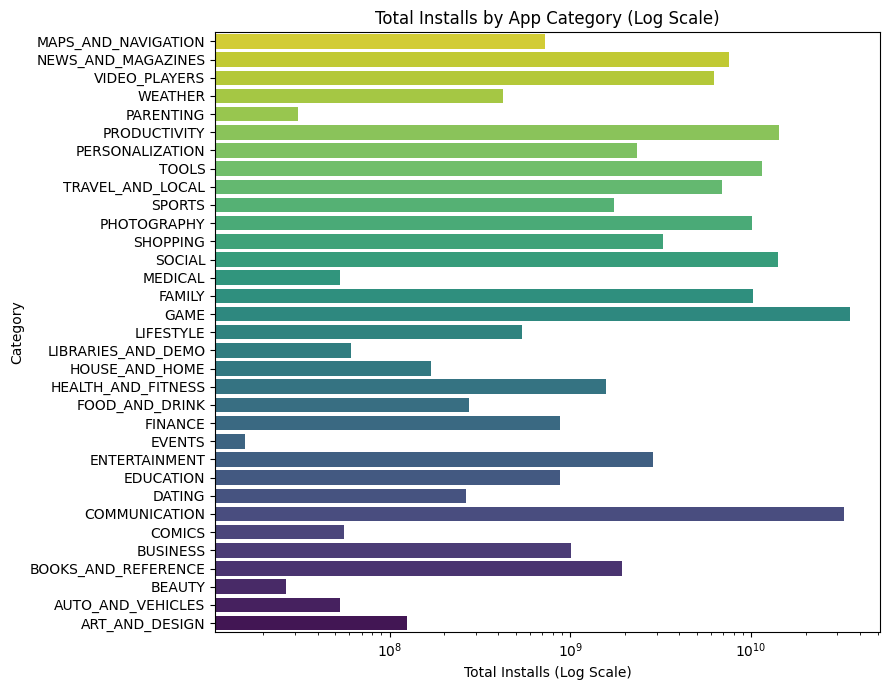

In [92]:
# Observations: Install counts vary drastically (e.g., 10,000 to 1,000,000,000+), applying a log scale to the x-axis to make the distribution clearer and easier to interpret.
plt.figure(figsize=(9, 7))
sns.barplot(
    data=data,
    x="Installs",
    y="Category",
    estimator=sum,
    errorbar=None,
    hue="Category",
    palette="viridis",
    legend=False,
)
plt.xscale("log")  # log scale for large range
plt.title("Total Installs by App Category (Log Scale)")
plt.xlabel("Total Installs (Log Scale)")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

3. 📈 What Apps types are most downloaded  "Paid" or "Free" 

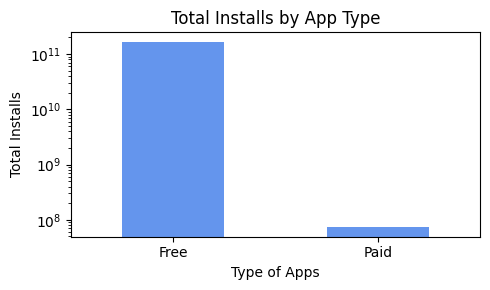

In [95]:
plt.figure(figsize=(5, 3))
data.groupby("Type")["Installs"].sum().plot(kind="bar", color="cornflowerblue")
plt.title("Total Installs by App Type")
plt.xlabel("Type of Apps")
plt.ylabel("Total Installs")
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4. 📈 Installs vs Reviews (Log Scale)

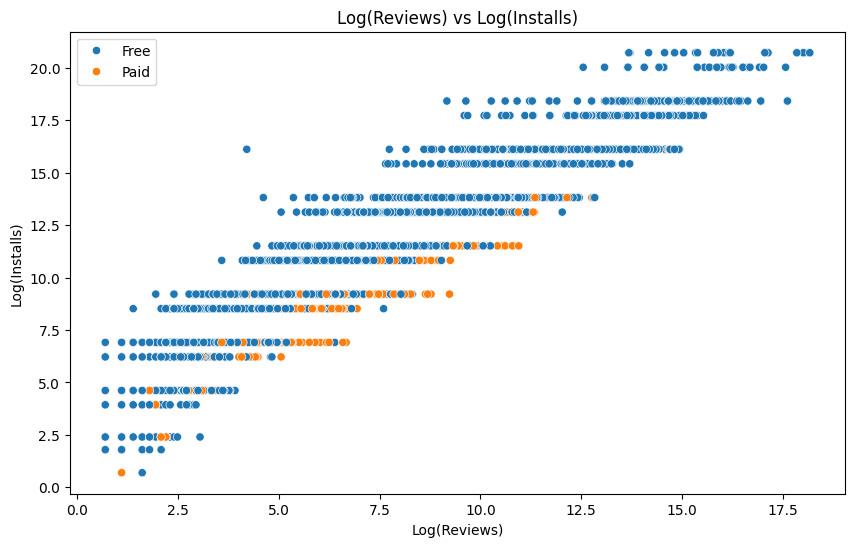

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=np.log1p(data["Reviews"]), y=np.log1p(data["Installs"]), hue=data["Type"]
)
plt.title("Log(Reviews) vs Log(Installs)")
plt.xlabel("Log(Reviews)")
plt.ylabel("Log(Installs)")
plt.legend()
plt.show()

4. 💰 Distribution of App Pricing

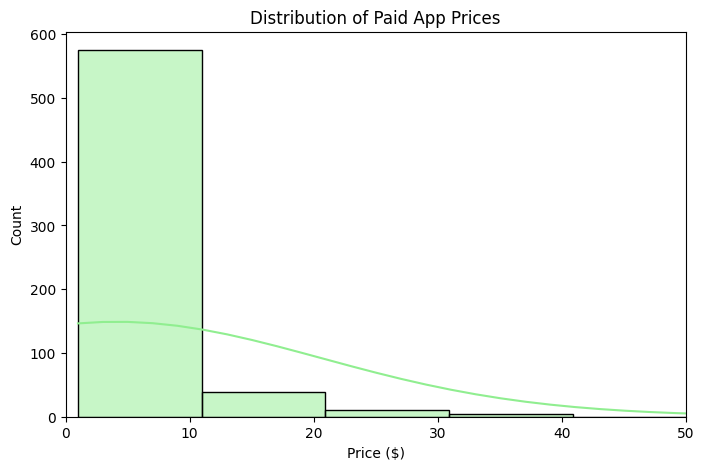

In [101]:
plt.figure(figsize=(8, 5))
free_vs_paid = data[data["Price"] > 0]
sns.histplot(free_vs_paid["Price"], bins=40, kde=True, color="lightgreen")
plt.title("Distribution of Paid App Prices")
plt.xlabel("Price ($)")
plt.xlim(0, 50)  # limit outliers
plt.show()

5. 🧠 Word Cloud for App Genres

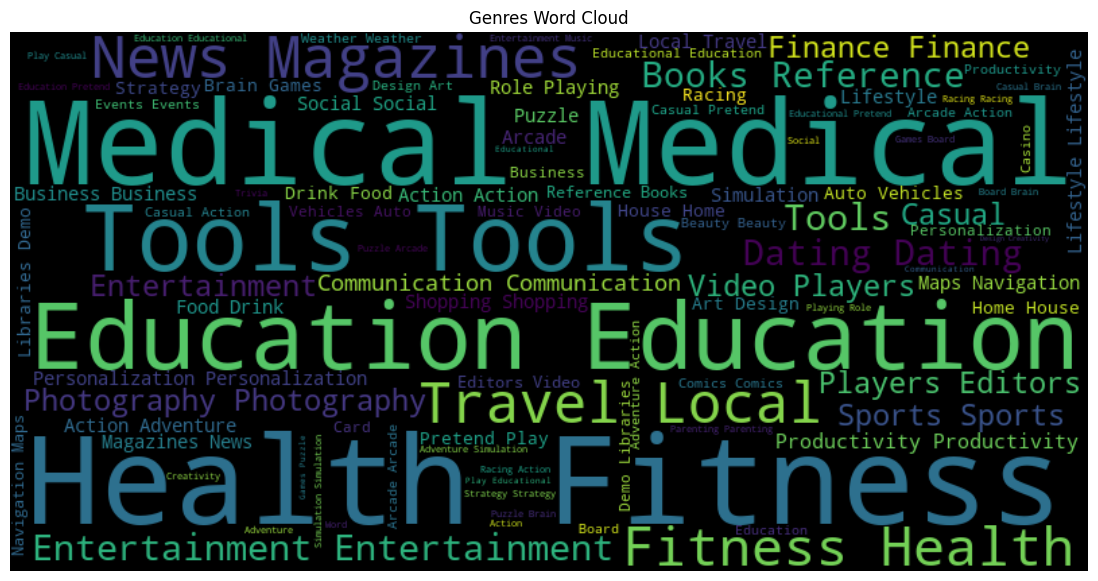

In [103]:
from wordcloud import WordCloud

text = " ".join(data["Genres"].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Genres Word Cloud")
plt.show()

 #   Predictive Modeling
 Basic Linear Regression


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess Data
data1 = data.copy()
data1.drop(columns=["App", "Last_Updated", "Current_Ver", "Android_Ver"], inplace=True)
data1 = pd.get_dummies(
    data1, columns=["Category", "Genres", "Content_Rating", "Type"]
)

# Step 2: Get top X features correlated with Installs
correlations = (
    data1.corr(numeric_only=True)["Installs"].abs().sort_values(ascending=False)
)
top_features = correlations[1:16].index  # exclude 'Installs' itself

X = data1[top_features]
y = data1["Installs"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = lr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
#not the greatest score but not the worst either factoring in the dataset diversity and little to no model tunning

R-squared: 0.453215254280413


In [231]:
#Create func to predict on new data(x variables)
def predict_new(input_dict, model, feature_columns):
    # Ensure the input dictionary has all the necessary columns
    input_df = pd.DataFrame([input_dict])

    
    missing_cols = set(feature_columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = (
            0  # Assign default value 
        )

    # Reorder columns to match the training order
    input_df = input_df[feature_columns]

    # Predict using the model
    return model.predict(input_df)[0]


c = {
    "Type_Paid": 0,  # assuming the app is free
    "Category_COMMUNICATION": 1,  # assuming the app is in the "Communication" category
    "Category_ENTERTAINMENT": 0,  # assuming the app is not in the "Entertainment" category
    "Category_GAME": 0,  # assuming the app is not in the "Game" category
    "Genres_Action": 0,  # assuming the app is not in the "Action" genre
    "Genres_Adventure": 1,  # assuming the app is  in the "Adventure" genre
    "Content_Rating_Teen": 0,  # assuming content rating is not "Teen"
    "Content_Rating_Everyone": 1,  # assuming content rating is "Everyone"
}

Predicted_installs = predict_new(c, lr, top_features)
Predicted_installs = "{:,}".format(int(Predicted_installs))
print("Forecasted Installs for App: ",Predicted_installs)

Forecasted Installs for App:  22,335,857
